# Natural Language Processing (NLP) Project
**Text classification based on sentiment analysis:** In this project, we are going to build a classifier that can determine the sentiment of a given text.

**Text Classification :** is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include *Positive, Neutral*, and *Negative*, *Review Ratings* and *Happy, Sad*.

## Contents

1. [Importing Dependencies](#Importing-Dependencies)
2. [Dataset Preprocessing](#Dataset-Preprocessing)
3. [Text Preprocessing](#Text-Preprocessing)

    3.1 [Cleaning Text](#Cleaning-Text)
    
    3.2 [Stopwords](#Stopwords)
    
    3.3 [Stemming](#Stemming)
    
4. [Train and Test Split](#Train-and-Test-Split)
5. [Preparing data to train](#Preparing-data-to-train)
6. [Building The Model](#Building-The-Model)
7. [Train The Model](#Train-The-Model)
8. [Model Evaluation](#Model-Evaluation)
9. [Conclusion](#Conclusion)
10. [Reference](#Reference)

##  Importing Dependencies
   We shall start by importing all the neccessary libraries.

*   **numpy :** to do some operation.
*   **pandas :** to read data and explore it.
*   **tensorflow :** to build a training model.
*   **re :** using regular expression to clean the text.
*   **pyarabic :** to remove arabic diacritics.
*   **matplotlib :** to plot the results.
*   **train_test_split :** to split data into train and test set.
*   **classification_report :** to use confusion matrix evaluation.
*   **SnowballStemmer :** to Stemming words.
*   **Tokenizer :** to tokenize words and give index for each unique word.
*   **pad_sequences :** to pad all sentences with same size.
*   **nltk :** to download stopwords.

In [20]:
#!pip install pyarabic
#!pip install pandas
#!pip install matplotlib
#!pip install sklearn
#!pip install scikit-learn
!pip install nltk
#!pip install 
#!pip install -U sklearn

     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 267.9/267.9 kB 3.3 MB/s eta 0:00:00


In [106]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import pyarabic.araby as araby
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.stem.snowball import SnowballStemmer
# from sklearn import model_selection
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [22]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##  Dataset Preprocessing
First we are going to read data from the file using pandas library.


In [24]:
df = pd.read_csv("ar_reviews_100k.tsv",sep='\t')
df

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,Negative,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,Negative,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,Negative,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,Negative,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


In [107]:
df["label"].value_counts()

label
Positive    33333
Mixed       33333
Negative    33333
Name: count, dtype: int64

In this project we are going to use binary classifier so we going to drop Mixed label.

In [25]:
#A = df.drop(["Mixed"], axis=0)
data = df.drop(index=df[df['label'] == "Mixed"].index)
data

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,Negative,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,Negative,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,Negative,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,Negative,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


In [26]:
data["label"].value_counts()

label
Positive    33333
Negative    33333
Name: count, dtype: int64

Now let's encod the label by giving **Positive** ==> **1** and **Negative** ==> 0

In [27]:
label_mapping = {"Positive": 1, "Negative": 0}

data["label"] = data["label"].map(label_mapping)
data

,label,text
0,1,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,1,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,1,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,1,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,0,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,0,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,0,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,0,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


In [28]:
data["label"].value_counts()

label
1    33333
0    33333
Name: count, dtype: int64

Now let's check if there is a duplicated or nulls data.

In [29]:
# check duplicated 
print(data.duplicated().sum())

0


In [30]:
# check nulls 
print(data.isnull().sum())

label    0
text     0
dtype: int64


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66666 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   66666 non-null  int64 
 1   text    66666 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


## Text Preprocessing
In general we use lot of punctuations and other words without any contextual meaning. It have no value as feature to the model we are training.
We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods.

### **Cleaning Text**
Texts in social media often contain email, hyperlink, diacrition, tag and people's ID to remove them we need to do some steps.

1.   Remove all diacritics : ex (وكأنَّ) to (وكأن).
2.   Remove all hamza : ex (وكأن) to (وكان).
3.   Remove all md : ex(وكآن) to(وكان).
4.   Remove all punctuation : ex (@^{وكان}//12) to (وكان).

In [33]:
# Function for cleaning arabic text.
def clean_text(text):
  W = [] # create an empty list.
  for word in text: # for each word in text.
    word = araby.strip_diacritics(word) # remove all diacritics.
    word = re.sub("[إأآا]", "ا", word) # remove all hamza and md.
    word = re.sub(r'[^ؤا-يئء]', ' ', word) # remove all punctuation.
    W.append(word) # append it to the text.
  return W

In [108]:
stop_words = list(set(stopwords.words('arabic'))) # extract all arabic stop words.

In [109]:
stop_words = clean_text(stop_words) # clean them and remove all hamza and md.

In [35]:
data["clean_text"] = clean_text(data['text']) # clean all the text.

In [36]:
data.head()

,label,text,clean_text
0,1,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,ممتاز نوعا ما النظافة والموقع والتجهيز والشا...
1,1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,احد اسباب نجاح الامارات ان كل شخص في هذه الدول...
2,1,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,هادفة وقوية تنقلك من صخب شوارع القاهرة الى...
3,1,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,خلصنا مبدئيا اللي مستني ابهار زي الفيل الاز...
4,1,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,ياسات جلوريا جزء لا يتجزا من دبي فندق متكامل...


### **Stopwords**
Stopwords are commonly used words in arabic which have no contextual meaning in an sentence. So therefore we remove them before classification.

In [112]:
print("Stopwords example :" , stop_words[:3])

Stopwords example : ['هاته', 'فاء', 'حين']


In [37]:
# Function for remove stope words.
def remove_stope_words(text):
  W = [] # create an empty list.
  for words in text: # for each review in text.
    tokens = word_tokenize(words) # tokenize sentence.
    text = ' '.join([word for word in tokens if word not in stop_words]) # remove stope words. 
    W.append(text) # append it to the text.
  return W

In [38]:
data["clean_text"] = remove_stope_words(data['clean_text']) # call remove_stope_words function.

In [39]:
data.head()

,label,text,clean_text
0,1,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ا...
1,1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,اسباب نجاح الامارات شخص الدولة يعشق ترابها نحب...
2,1,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,هادفة وقوية تنقلك صخب شوارع القاهرة هدوء جبال ...
3,1,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,خلصنا مبدئيا اللي مستني ابهار زي الفيل الازرق ...
4,1,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,ياسات جلوريا جزء يتجزا دبي فندق متكامل الخدمات...


### **Stemming**
Stemming involves the use of a sequence of rules to convert a wordform to a simpler form.

In [40]:
def Stemming(text):
  W = [] # create an empty list.
  for words in text: # for each review in text.
    tokens = word_tokenize(words) # tokenize sentence.
    text = ' '.join([s_strmmer.stem(word) for word in tokens]) # Stemming words.
    W.append(text) # append it to the text.
  return W

In [41]:
s_strmmer = SnowballStemmer(language="arabic") # install stemmer for arabic language.
data["SText"] = Stemming(data['clean_text']) # call Stemming function.

In [42]:
data

,label,text,clean_text,SText
0,1,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ا...,ممتاز نوع نظاف موقع تجهيز شاطيء مطعم
1,1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,اسباب نجاح الامارات شخص الدولة يعشق ترابها نحب...,اسباب نجاح امار شخص دول يعشق تراب نحب امار ومض...
2,1,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,هادفة وقوية تنقلك صخب شوارع القاهرة هدوء جبال ...,هادف وقو تنقل صخب شوارع قاهر هدوء جبال شيش تعر...
3,1,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,خلصنا مبدئيا اللي مستني ابهار زي الفيل الازرق ...,خلص مبدء الل مست ابهار زي فيل ازرق ميقراش احس ...
4,1,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,ياسات جلوريا جزء يتجزا دبي فندق متكامل الخدمات...,ياس جلور جزء يتجز دب ندق متكامل خدم مريح نفس يوجد
...,...,...,...,...
99994,0,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...,معرفش ليه كنت عاوزة اكملها وهي مش عاجباني البد...,معرفش ليه كنت عاوز اكمل وه مش عاجب بدا القص تق...
99995,0,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...,يستحق يكون بوكنق لانه سيئ شي يوجد خدمة افطار ص...,يستحق يكو وكنق لان سيء شي يوجد خدم افطار صباح ...
99996,0,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...,كتاب ضعيف جدا ولم استمتع فى قصه سرد لحاله مشهد...,كتاب ضعيف جدا ولم استمتع فى قصه سرد لحال مشهد ...
99997,0,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...,مملة جدا محمد حسن علوان فنان بالكلمات والوصف ع...,ممل جدا محمد حسن علوا فنا كلم وصف عند دقيق زاي...


## **Train and Test Split**
We need to split data into train and test set the test set is 20% of the data.

In [46]:
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(
    data.SText.values,
    data.label,
    test_size=0.2,
    random_state=1
)

In [47]:
training_labels.value_counts()

label
0    26743
1    26589
Name: count, dtype: int64

In [48]:
testing_labels.value_counts()

label
1    6744
0    6590
Name: count, dtype: int64

## **Preparing data to train**
**Tokenization :** given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens.

In [116]:
# tokenizer create tokens for every word in the data corpus and map them to a index using dictionary.
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

Now we got a tokenizer object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. We seek a little help from pad_sequence to do our job. It will make all the sequence in one constant length max_sequence_len.

In [118]:
# converting text sentence to sequence of numbers.
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

# return length of the longest sequence.
max_sequence_len = max([len(x) for x in training_sequences]) 

# pad the sequences with the maximum sequence length.
training_padded = padded = pad_sequences(training_sequences, maxlen=max_sequence_len, padding='post')
testing_padded = padded = pad_sequences(testing_sequences, maxlen=max_sequence_len, padding='post')

In [119]:
vocab_size = len(tokenizer.word_index) + 1  # word_index contains the index for each word.
print("Training Shape:",training_padded.shape)
print("Testing Shape:",testing_padded.shape)
print("max sequence length :" , max_sequence_len)
print("vocab size :" , vocab_size)

Training Shape: (53332, 1108)
Testing Shape: (13334, 1108)
max sequence length : 1108
vocab size : 67843


In [120]:
print(training_padded[0])

[20451  1312  1048 ...     0     0     0]


## **Building The Model**
**Neural networks** are artificial systems that were inspired by biological neural networks. These systems learn to perform tasks by being exposed to various datasets and examples without any task-specific rules. The idea is that the system generates identifying characteristics from the data they have been passed without being programmed with a pre-programmed understanding of these datasets. Neural networks are based on computational models for threshold logic. Threshold logic is a combination of algorithms and mathematics.

For model architecture, we use

1.   **Embedding Layer :** Generates Embedding Vector for each input sequence.

2.   **Global Average Pooling 1D Layer :** returns a fixed-length output vector for each example by averaging over the sequence dimension.

3.   **Dense Layers :** Fully Connected Layers with 16 hidden units.

4.   **Dense Layers :** Densely Connected Layers with 1 hidden units for classification.

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 300, input_length=max_sequence_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer= tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# define an earlystop function to stop when val_loss is increased for 600 epoch.
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=600, verbose=1, mode='auto')

# define a Model Check point to save the best val_accuracy.
save = tf.keras.callbacks.ModelCheckpoint('mymodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Compile the model using the Adam optimizer and binary_crossentropy loss.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1108, 300)         20352900  
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                7224      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 20,360,149
Trainable params: 20,360,149
Non-trainable params: 0
_________________________________________________________________


## **Train The Model**
Now let's train our model on 10000 epoch with batch size 1024.

In [59]:
num_epochs = 10000
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), callbacks=[earlystop,save], batch_size=1024, verbose=2)# 

Epoch 1/10000

Epoch 1: val_accuracy improved from -inf to 0.49430, saving model to mymodel.h5
53/53 - 37s - loss: 0.7196 - accuracy: 0.5031 - val_loss: 0.7059 - val_accuracy: 0.4943 - 37s/epoch - 697ms/step
Epoch 2/10000

Epoch 2: val_accuracy improved from 0.49430 to 0.49453, saving model to mymodel.h5
53/53 - 33s - loss: 0.7001 - accuracy: 0.5069 - val_loss: 0.6962 - val_accuracy: 0.4945 - 33s/epoch - 628ms/step
Epoch 3/10000

Epoch 3: val_accuracy improved from 0.49453 to 0.50645, saving model to mymodel.h5
53/53 - 33s - loss: 0.6947 - accuracy: 0.5132 - val_loss: 0.6936 - val_accuracy: 0.5064 - 33s/epoch - 621ms/step
Epoch 4/10000

Epoch 4: val_accuracy improved from 0.50645 to 0.51912, saving model to mymodel.h5
53/53 - 34s - loss: 0.6934 - accuracy: 0.5033 - val_loss: 0.6930 - val_accuracy: 0.5191 - 34s/epoch - 632ms/step
Epoch 5/10000

Epoch 5: val_accuracy did not improve from 0.51912
53/53 - 31s - loss: 0.6929 - accuracy: 0.5399 - val_loss: 0.6928 - val_accuracy: 0.4979 - 31s

In [60]:
model.save("mymodel2.h5") # to save the model.

## **Model Evaluation**
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

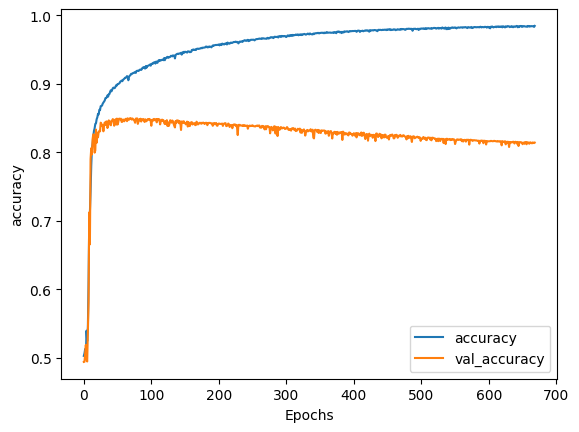

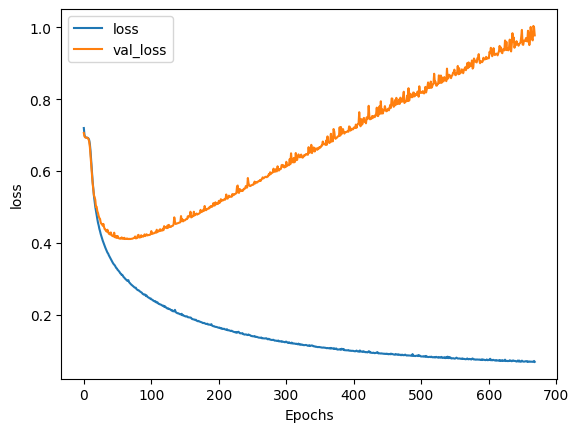

In [61]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**Confusion Matrix** metrics are performance measures which help us find the accuracy of our classifier. There are four main metrics.

1.   **Accuracy :** The accuracy is used to find the portion of correctly classified values. It tells us how often our classifier is right.
It is the sum of all true values divided by total values.

\begin{align}
accuracy &= \dfrac{TP + TN}{TP + TN + FP + FN}
\end{align}

2.   **Precision :** Precision is used to calculate the model's ability to classify positive values correctly. It answers the question, "When the model predicts a positive value, how often is it right?". It is the true positives divided by total number of predicted positive values.

\begin{align}
Precision &= \dfrac{TP}{TP + FP}
\end{align}

3.   **Recall :** It is used to calculate the model's ability to predict positive values. "How often does the model actually predict the correct positive values?". It is the true positives divided by total of actual positive values.

\begin{align}
Recall &= \dfrac{TP}{TP + FN}
\end{align}

4.   **F1-Score :** It is the harmonic mean of Recall and Precision. It is useful when you need to take both Precision and Recall into account.

\begin{align}
F1-Score &= \dfrac{2*Precision*Recall}{Precision + Recall}
\end{align}



In [105]:
p_pred = model.predict(testing_padded)
p_pred = p_pred.flatten()
y_pred = np.where(p_pred > 0.5, 1, 0)
print(classification_report(testing_labels, y_pred))

417/417 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6590
           1       0.82      0.81      0.82      6744

    accuracy                           0.81     13334
   macro avg       0.81      0.81      0.81     13334
weighted avg       0.81      0.81      0.81     13334



## **Conclusion**
When evaluating the sentiment (positive, negative, neutral) of a given text document, research shows that human analysts tend to agree around 80-85% of the time. This is the baseline we (usually) try to meet or beat when we’re training a sentiment scoring system. But this does mean that you’ll always find some text documents that even two humans can’t agree on, even with their wealth of experience and knowledge.

Of the 13334-reviews test set, the model correctly identified 82% of the positive reviews and 81% of the negative ones. This is sentiment accuracy score of 81.5%. That means our basic sentiment scoring model already matched human agreement levels.

## **Reference**
<h3>Some of the resource and people help us to do the project</h3>


<font color='black'>
<ul>
<li> <b>Arabic 100k Reviews Dataset</b> at <a href="https://www.kaggle.com/datasets/abedkhooli/arabic-100k-reviews"> Kaggle</a> </li>
    
<li> <b>Loading dataset using pandas</b> at <a href="https://www.kaggle.com/code/hendlabib12/project">Kaggle</a></li>

<li> <b>Cleaning the text</b> at <a href="https://stackoverflow.com/questions/66988153/removing-arabic-diacritic-using-python">stack Overflow</a></li>

<li> <b>Building Model</b> at <a href="https://www.tensorflow.org/text/guide/word_embeddings"> TensorFlow</a></li>

<li> <b>Neural Network Definition</b> at <a href="https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/"> geeksforgeeks</a></li>

<li> <b>Sentiment Accuracy: Explaining the Baseline and How to Test It</b> at <a href="https://www.lexalytics.com/blog/sentiment-accuracy-baseline-testing/"> Lexalytics</a></li>

<li> <b>Confusion Matrix</b> at <a href="https://youtu.be/prWyZhcktn4"> YouTube</a></li>

<li> <b>NLP from zero to hero</b> at <a href="https://www.youtube.com/watch?v=fNxaJsNG3-s"> YouTube</a></li>

<li> <b>Note book</b> at <a href="https://www.kaggle.com/code/fahadotaibi/modified-lstm/edit"> Kaggle</a></li>

</ul>
</font>